In [13]:
import torch
import array
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from scipy.optimize import curve_fit 

[9.96853591e-01 9.98105674e+00 1.58411738e+00 6.13745127e-20]


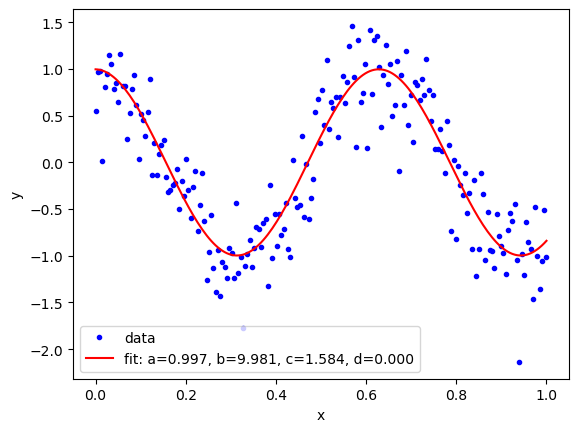

In [17]:
def func(x, a, b, c ,d):
    return (a * np.sin(b*x+c)) + d
#Define the data to be fit with some noise:
n=200
xdata=np.linspace(0,1,n)
y = func(xdata, 1.0, 10.0, 1.5, 0.0) 
rng = np.random.default_rng()
epss=0.3
y_noise =epss * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b.', label='data')

#Fit for the parameters a, b, c,d of the function func:
#Constrain the optimization to the region of 0.5<= a <= 2, 7 <= b <= 11 , 0 <= c <= 2 ,and 0 <= d <= 0.1 THEN,
popt, pcov = curve_fit(func, xdata, ydata, p0=None ,bounds=([0.5, 7., 0., 0.0], [1.5, 11., 2., 0.1]))
popt
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
